<a href="https://colab.research.google.com/github/taliahtarik/dsprojectjterm/blob/main/day1_hospital_readmissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving FY_2024_Hospital_Readmissions_Reduction_Program_Hospital.csv to FY_2024_Hospital_Readmissions_Reduction_Program_Hospital (1).csv


In [6]:
file = "FY_2024_Hospital_Readmissions_Reduction_Program_Hospital.csv"
data = pd.read_csv(file)
data.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.8916,3.5325,3.9618,Too Few to Report,07/01/2019,06/30/2022
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,616.0,NaN,1.1003,23.1263,21.0184,149,07/01/2019,06/30/2022
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,274.0,NaN,0.9332,12.9044,13.8283,32,07/01/2019,06/30/2022
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,404.0,NaN,0.9871,17.0529,17.2762,68,07/01/2019,06/30/2022
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,126.0,NaN,0.9517,9.8131,10.3112,11,07/01/2019,06/30/2022


In [8]:
data['Number of Discharges'].fillna(data['Number of Discharges'].median(), inplace=True)

In [10]:
data['Number of Readmissions'] = pd.to_numeric(data['Number of Readmissions'], errors='coerce')
readmissions_by_diagnosis = data.groupby('Measure Name')['Number of Readmissions'].sum()
readmissions_by_diagnosis_sorted = readmissions_by_diagnosis.sort_values(ascending=False)
top_5_diagnoses = readmissions_by_diagnosis_sorted.head(5)
for diagnosis, readmissions in top_5_diagnoses.items():
    print(f"{diagnosis}: {int(readmissions):,} readmissions.")


READM-30-HF-HRRP: 148,213 readmissions.
READM-30-PN-HRRP: 101,169 readmissions.
READM-30-COPD-HRRP: 39,275 readmissions.
READM-30-AMI-HRRP: 33,269 readmissions.
READM-30-HIP-KNEE-HRRP: 6,721 readmissions.


reads Heart Failure, Pneuomnia, Chronic Obstructive Pulmonary Disease Care, Heart Attack Care, and Total Hip/Knee Arthroplasty

research questions: How do the excess readmission ratio and the predicted readmission rate influence the actual number of readmissions across healthcare facilities in various states?

How can the excess readmission ratio and predicted readmission rate be used as indicators of the actual number of readmissions across healthcare facilities in different states?



In [11]:
data.describe()
data[['Excess Readmission Ratio', 'Predicted Readmission Rate', 'Number of Readmissions']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18774 entries, 0 to 18773
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Excess Readmission Ratio    12077 non-null  float64
 1   Predicted Readmission Rate  12077 non-null  float64
 2   Number of Readmissions      7890 non-null   float64
dtypes: float64(3)
memory usage: 440.1 KB


<Axes: >

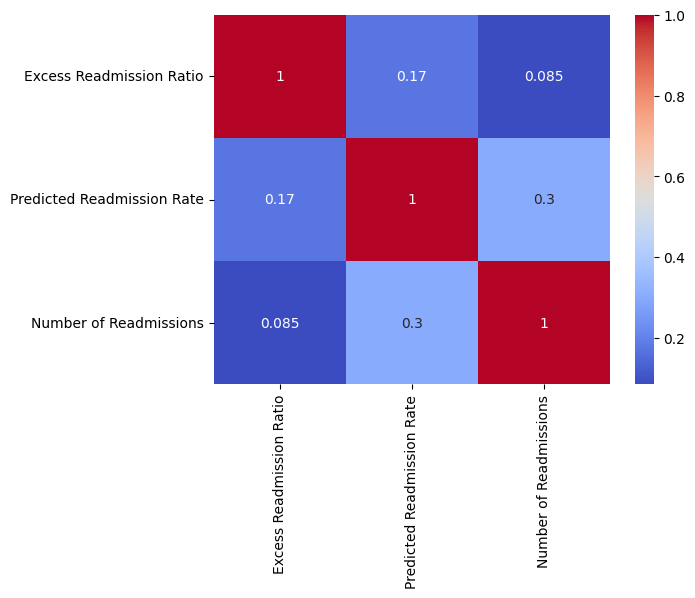

In [12]:
correlation_matrix = data[['Excess Readmission Ratio', 'Predicted Readmission Rate', 'Number of Readmissions']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')